In [22]:
import math
import numpy as np
import scipy.integrate as spi

# from scipy.integrate import quad, quadrature, romberg, quad_explain
import matplotlib.pyplot as plt
from Whisker_plot import whisker_plot

In [23]:
# ---------------Шрифты для графиков-----------------------------------------------
font = {"fontname": "Times New Roman", "fontsize": 12}
font1 = {"fontname": "Times New Roman", "fontsize": 14}
font2 = {"fontname": "Times New Roman", "fontsize": 14, "fontweight": "bold"}
font_l = {"size": 12, "family": "Times New Roman"}
# ---------------------------------------------------------------------------------

In [112]:
bOf(60, 10)

np.float64(0.15038373318043527)

C:\Users\User\AppData\Local\Temp\ipykernel_15712\3854857659.py:5: RuntimeWarning: invalid value encountered in sqrt
  nomenator = 4*t*t*np.sqrt((KsKt*KsKt - t*t)*(t*t - 1))


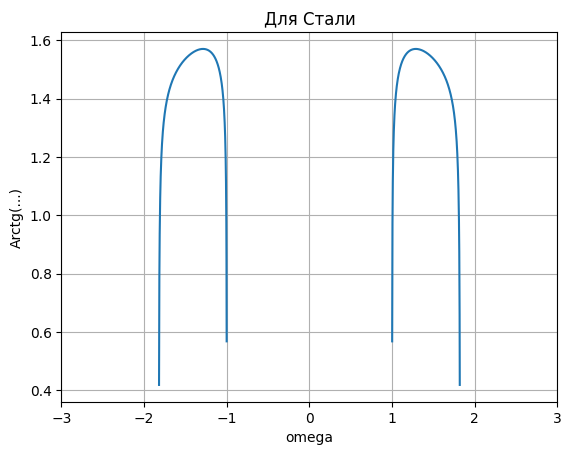

In [208]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                 Arctan Calculation
# -----------------------------------------------------------------------------------------------------------------------
# print('atan1', 180 / np.pi * np.arctan(1))
# print('cos', np.cos(60 * np.pi/180))

KsKl = {"steel": 1.82, "alum": 2}

KrKl = {"steel": (1 / 0.93) * 1.82, "alum": (1 / 0.93) * 2}

x_0 = 15

x = np.linspace(-1000, 1000, 1000000)
y1 = ARCTG(x, KsKl["steel"])
y2 = ARCTG(x, KsKl["alum"])

plt.plot(x, y1)
plt.title("Для Стали")
plt.ylabel("Arctg(...)")
plt.xlabel("omega")
plt.xlim(-3, 3)
plt.grid()


# Различие! 

у Н.В. ро было равномерно от 0 до 1. Это некорректно. Заменил на RHO_new.

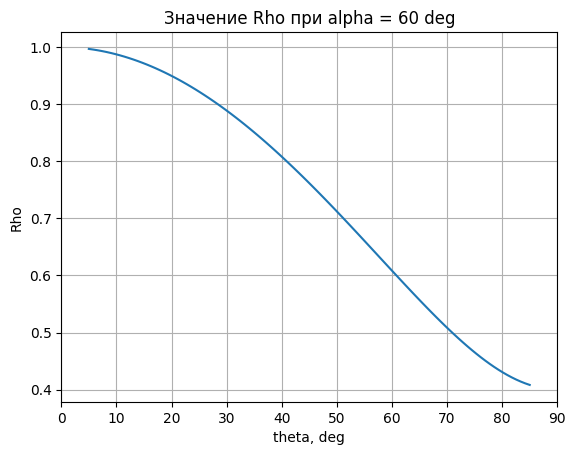

In [289]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  Rho Determination
# -----------------------------------------------------------------------------------------------------------------------

theta = np.linspace(5, 85, 100)
alpha = [55, 60, 66.4]
#alpha = [45, 50, 60, 70, 75, 80]

rho = RHO_new(theta, alpha[2])
plt.plot(theta, rho)
plt.title("Значение Rho при alpha = 60 deg")
plt.ylabel("Rho")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()


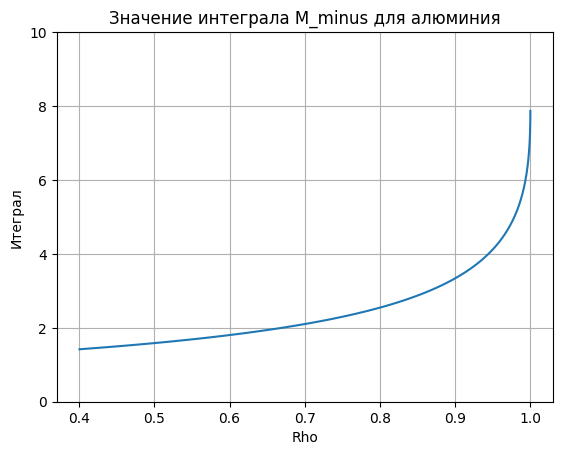

In [215]:
# -----------------------------------------------------------------------------------------------------------------------
#                                              Integral calculation
# -----------------------------------------------------------------------------------------------------------------------
#rho = np.linspace(0, 1, 100)

rho = RHO_new(theta, alpha[2])

#rho = np.linspace(min(RHO_new(theta, alpha[0])), max(RHO_new(theta, alpha[0])), 100)

Integ_M_plus_st = Integration(
    rho, KsKl["steel"], Integrand_M_plus, 1, KsKl["steel"], 500
)
Integ_M_minus_st = Integration(
    rho, KsKl["steel"], Integrand_M_minus, 1, KsKl["steel"], 500
)
Integ_M_plus_al = Integration(rho, KsKl["alum"], Integrand_M_plus, 1, KsKl["alum"], 500)
Integ_M_minus_al = Integration(
    rho, KsKl["alum"], Integrand_M_minus, 1, KsKl["alum"], 500
)

"""
Integ_vect = []
cnt =0
for i in rho:
    print('Integral calculating for point No:', cnt, ' from', len(rho))
    #res, err = quad(Integrand, 1, KsKt['steel'], args=(KsKt['steel'],i))
    res, err = quadrature(Integrand_M_plus, 1, KsKt['steel'], args=(KsKt['steel'], i), maxiter=1000)
    #print('Res=', res, 'err=', err)
    Integ_vect.append(res)
    cnt += 1
"""
plt.plot(rho, Integ_M_minus_al)
plt.title("Значение интеграла M_minus для алюминия")
plt.ylabel("Итеграл")
plt.xlabel("Rho")
# plt.xlim(-3,3)
plt.ylim(0, 10)
plt.grid()

In [49]:
alpha[2]

60

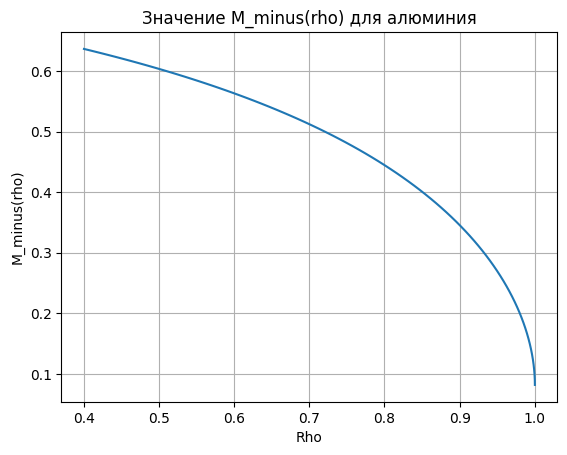

In [214]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                   M calculation
# -----------------------------------------------------------------------------------------------------------------------
M_plus_st = M(np.array(Integ_M_plus_st))
M_minus_st = M(np.array(Integ_M_minus_st))
M_plus_al = M(np.array(Integ_M_plus_al))
M_minus_al = M(np.array(Integ_M_minus_al))

# print('M_minus_st:')
# print(M_minus_st[-1])
# print('M_minus_al:')
# print(M_minus_al[-1])


plt.plot(rho, M_minus_al)
plt.title("Значение M_minus(rho) для алюминия")
plt.ylabel("M_minus(rho)")
plt.xlabel("Rho")
# plt.xlim(-3,3)
# plt.ylim(0,10)
plt.grid()

M_st = np.multiply(np.array(M_plus_st), np.array(M_minus_st))
M_al = np.multiply(np.array(M_plus_al), np.array(M_minus_al))

# plt.plot(rho, M_st)
# plt.title("Значение M(rho) для стали")
# plt.ylabel("M(rho)")
# plt.xlabel("Rho")
# # plt.xlim(-3,3)
# # plt.ylim(0,10)
# plt.grid()


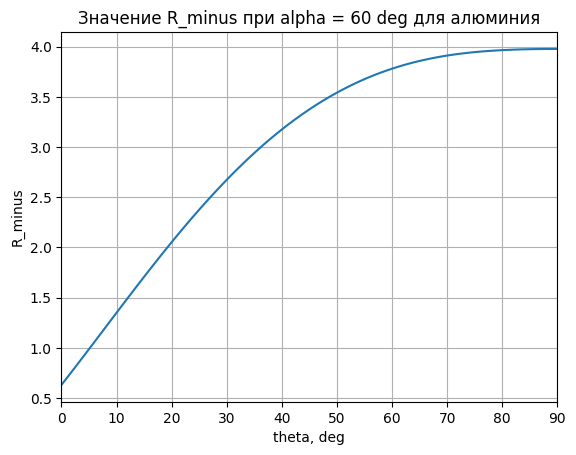

In [217]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                 Further calculations
# -----------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------
#                                                  R_minus Determination
# -----------------------------------------------------------------------------------------------------------------------
theta = np.linspace(0, 90, 100)

plt.plot(theta, R_minus(M_minus_al, KsKl["alum"], KrKl["alum"], theta, alpha[2]))
plt.title("Значение R_minus при alpha = 60 deg для алюминия")
plt.ylabel("R_minus")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()

# Различие! 

у Н.В. лишний минус внутри корня. В результате у него гамма действительная, а у меня мнимая. По модулю совпадает

In [218]:
alpha[2]

66.4

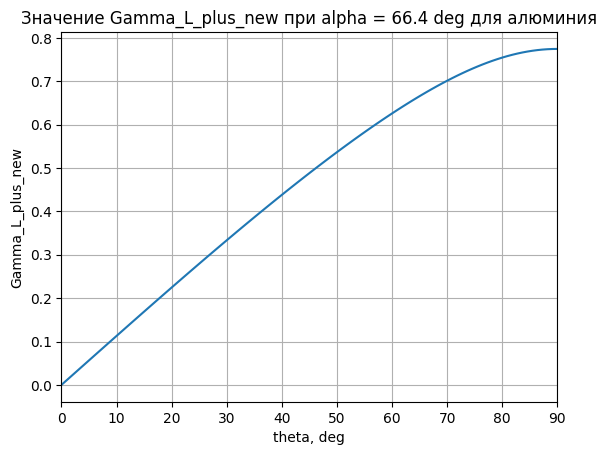

In [221]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  Gamma_L Determination
# -----------------------------------------------------------------------------------------------------------------------
plt.plot(theta, Gamma_L_plus(theta, alpha[2]).imag)
plt.title("Значение Gamma_L_plus_new при alpha = 66.4 deg для алюминия")
plt.ylabel("Gamma_L_plus_new")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()



# def Gamma_L_plus_new(theta, alpha):
#     return np.sqrt(  
#               -np.sqrt(
#                         Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha)
#                                 ) 
#                + 1)



In [222]:
# plt.plot(theta, Ksi_new(alpha[1]))
# plt.xlabel("theta, deg")
# plt.xlim(0, 90)
# plt.grid()


Ksi_new(alpha[2])

np.float64(-0.4003490325568949)

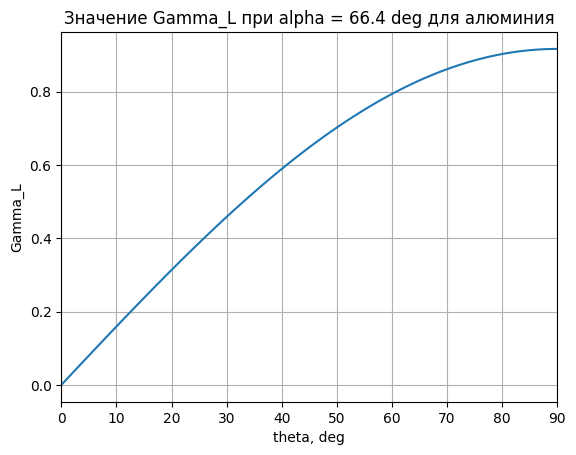

In [228]:
plt.plot(theta, Gamma_L(theta, alpha[2], KsKl["alum"]).imag)
plt.title("Значение Gamma_L при alpha = 66.4 deg для алюминия")
plt.ylabel("Gamma_L")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()
plt.show()

In [80]:
np.sqrt(-1.0 + 0j)

np.complex128(1j)

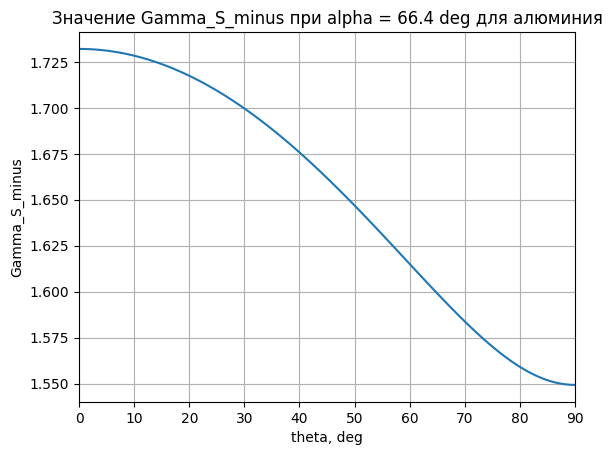

In [229]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  Gamma_S Determination
# -----------------------------------------------------------------------------------------------------------------------

plt.plot(theta, Gamma_S_minus(theta, alpha[2], KsKl["alum"]))
plt.title("Значение Gamma_S_minus при alpha = 66.4 deg для алюминия")
plt.ylabel("Gamma_S_minus")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()

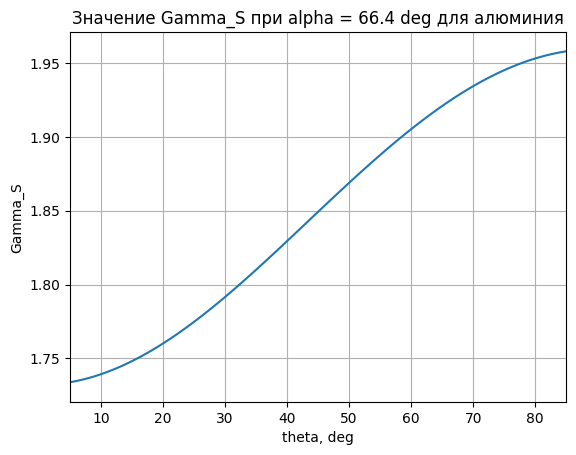

In [232]:
plt.plot(theta, Gamma_S(theta, alpha[2], KsKl["alum"]).imag)
plt.title("Значение Gamma_S при alpha = 66.4 deg для алюминия")
plt.ylabel("Gamma_S")
plt.xlabel("theta, deg")
plt.xlim(5, 85)
plt.grid()
plt.show()

In [89]:
theta[94]

np.float64(85.45454545454545)

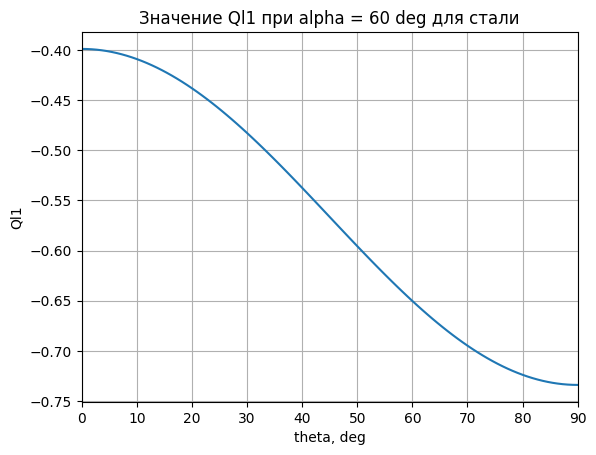

In [233]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  QL1 Determination
# -----------------------------------------------------------------------------------------------------------------------
#plt.subplot(1, 3, 2)
plt.plot(theta, QL1(theta, alpha[2], KsKl["alum"]).imag)
plt.title("Значение Ql1 при alpha = 60 deg для стали")
plt.ylabel("Ql1")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()

In [250]:
def k2 (t, KsKt):
    return (t * t - 1)

def ARCTG(t, KsKt):
    nomenator = 4*t*t*np.sqrt((KsKt*KsKt - t*t)*(t*t - 1))
    denomenator =(0.5*KsKt*KsKt - t*t)*(0.5*KsKt*KsKt - t*t)
    result = np.arctan(nomenator / denomenator)
    return result

def ARCTG2(t, KsKt):
    nomenator = 4*t*t*np.sqrt(KsKt*KsKt - t*t)*np.sqrt(t*t - 1)
    denomenator =(0.5*KsKt*KsKt - t*t)*(0.5*KsKt*KsKt - t*t)
    result = np.arctan(nomenator / denomenator)
    return result

def ARCTG_deg(t, KsKt):
    nomenator = 4*t*t*math.sqrt((KsKt*KsKt - t*t)*(t*t - 1))
    denomenator =(0.5*KsKt*KsKt - t*t)*(0.5*KsKt*KsKt - t*t)
    result = math.atan(nomenator / denomenator)
    result = math.degrees(result)
    return result

def RHO(theta, alpha):
    cos = np.cos(theta * np.pi/180)
    ssin1 = np.sin(alpha * np.pi/180) * np.sin(alpha * np.pi/180)
    ssin2 = np.sin(theta * np.pi/180) * np.sin(theta * np.pi/180)
    result = cos * np.sqrt(1 + ssin1 * ssin2)
    return result

def Integrand_M_plus(x, KSKT, rho):
    return ARCTG(x, KSKT) / (x + rho)

def Integrand_M_minus(x, KSKT, rho):
    return ARCTG(x, KSKT) / (x - rho)

def Integration(argument, KSKT, Integrand, low_bond, up_bond, maxiter):
    Integ_vect = []
    cnt = 0
    for i in argument:
       # print('Integral calculating for point No:', cnt, ' from', len(rho))
        # res, err = quad(Integrand, 1, KsKt['steel'], args=(KsKt['steel'],i))
        res, err = spi.quad(Integrand, low_bond, up_bond, args=(KSKT, i))
        # print('Res=', res, 'err=', err)
        Integ_vect.append(res)
        cnt += 1
    return Integ_vect

def M(intergal):
    return np.exp(-intergal/np.pi)

def aOf(alpha):
    return -np.cos(alpha * np.pi/180)

def bOf(theta, alpha):
    return -np.sin(alpha * np.pi/180) * np.sin(theta * np.pi/180) #ошибка! другой знак. исправлено.

def cOf(theta, alpha):
    return -np.sin(alpha * np.pi/180) * np.cos(theta * np.pi/180) #ошибка! другой знак. исправлено.

def RHO_new(theta, alpha):
    return np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha)*cOf(theta, alpha))

def R_minus(M_minus, KsKl, KrKl, theta, alpha):
    return np.sqrt(2) * M_minus * np.sqrt(KsKl * KsKl - 1) * (KrKl + RHO_new(theta, alpha))

def R_plus(M_plus, KsKl, KrKl, theta, alpha):
    return np.sqrt(2) * M_plus * np.sqrt(KsKl * KsKl - 1) * (KrKl - RHO_new(theta, alpha))

def R(R_minus, R_plus):
    return R_minus * R_plus

def phi_rec2(theta, alpha):
    return 180 / np.pi * np.arctan(- np.tan(alpha * np.pi/180) * np.sin(theta * np.pi/180))

def Ksi(theta, alpha):
    return np.multiply(np.sqrt(1 - cOf(theta, alpha) * cOf(theta, alpha)), np.cos(phi_rec2(theta, alpha) * np.pi/180)) #фи переводим в радианы

def Ksi_new(alpha):
    return -np.cos(alpha * np.pi/180)

def Ksi_sqrt(theta, alpha):
    return np.sqrt(1 - cOf(theta, alpha) * cOf(theta, alpha))

def Ksi_phirec(theta, alpha):
    return np.cos(phi_rec2(theta, alpha) * np.pi/180)

def Gamma_L_minus(theta, alpha):
    return np.sqrt(np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha)) + 1)

def Gamma_L_plus(theta, alpha):
    return np.sqrt(np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) + 0j) - 1 + 0j)

def Gamma_L_plus_new(theta, alpha):
    return np.sqrt(-np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) + 0j) + 1 + 0j)

def Gamma_L(theta, alpha, KsKl):
    return np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) - 1 + 0j) #Ошибка! Было KsKl

def Gamma_S_minus(theta, alpha, KsKl):
    return np.sqrt(np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) + 0j) + KsKl + 0j)

def Gamma_S_plus(theta, alpha, KsKl):
    return np.sqrt(np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) + 0j ) - KsKl + 0j)

def Gamma_S(theta, alpha, KsKl):
    return np.sqrt(Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha) - KsKl * KsKl + 0j)

def QL1(theta, alpha, KsKl):
    return -1j * (0.5 * KsKl**2 - (1 - bOf(theta, alpha)**2 )) / np.sqrt(2 * np.pi) #Ошибка! Не было 1 в числителе. Исправил.

def QL3(theta, alpha):
    return -1j * bOf(theta, alpha) * (aOf(alpha)**2 + cOf(theta, alpha)**2) / np.sqrt(2 * np.pi) #Ошибка: b0f вместо c0f

def f_1(M_minus, KsKl, KrKl, theta, alpha):
    return (0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2 + 0j) / (Gamma_L_plus(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)) + 0j)

#f1_1[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_minus1[i] * gamma_Lplus1[i] * (-zeta1[i] + a_0f))

def f_1_numenator(M_minus, KsKl, KrKl, theta, alpha):
    return (0.5 * KsKl * KsKl - (Ksi_new(alpha) * Ksi_new(alpha) + cOf(theta, alpha) * cOf(theta, alpha)))

def f_1_denumenator(M_minus, KsKl, KrKl, theta, alpha):
    return (Gamma_L_plus_new(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha))

def f_1_denumenator_coef(M_minus, KsKl, KrKl, theta, alpha):
    return 1.0 / Gamma_L_plus_new(theta, alpha) * 1 / R_minus(M_minus, KsKl, KrKl, theta, alpha)

def f_2(M_minus, KsKl, KrKl, theta, alpha):
    return Gamma_S_minus(theta, alpha, KsKl) / (R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)))

def f_2_gamma(M_minus, KsKl, KrKl, theta, alpha):
    return Gamma_S_minus(theta, alpha, KsKl)

def f_2_R_minus(M_minus, KsKl, KrKl, theta, alpha):
    return 1 / R_minus(M_minus, KsKl, KrKl, theta, alpha)

def f_2_Ksi(M_minus, KsKl, KrKl, theta, alpha):
    return (Ksi_new(alpha) + aOf(alpha))

def p(theta, alpha):
    return np.sqrt(1-cOf(theta, alpha) * cOf(theta, alpha))

def r(theta, alpha, x_0):
    return -x_0 * np.sqrt(1-cOf(theta, alpha) * cOf(theta, alpha))/ aOf(alpha)

def modFdymenO_plus(M_minus, theta, alpha, KsKl, KrKl, x_0): #Ошибка: в знаменателе пропущена скобка (KsKl**2 - 1), также перед QL3 нет 1j. Corrected.
    return np.sqrt(p(theta, alpha)/((KsKl**2 - 1)*(KsKl + aOf(alpha)))) * (1/np.sqrt(r(theta, alpha, x_0))) * (-QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha) + 1j * QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha)) * np.sin(phi_rec2(theta, alpha) * np.pi/180)

def modFdymenO_minus(M_minus, theta, alpha, KsKl, KrKl, x_0):
    return np.sqrt(p(theta, alpha)/(KsKl + aOf(alpha))) * (1/np.sqrt(r(theta, alpha, x_0))) * np.absolute(
        (QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha) - QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha))
        * np.sin(phi_rec2(theta, alpha) * np.pi/180))

def pot_Ql1_f1(M_minus, theta, alpha, KsKl, KrKl, x_0):
    return QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha)

def pot_Ql3_f2(M_minus, theta, alpha, KsKl, KrKl, x_0):
    return  QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha)

def pot_Ql1_f1_plus_Ql3_f2(M_minus, theta, alpha, KsKl, KrKl, x_0):
    return QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha) +  QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha)

def pot_Ql1_f1_minus_Ql3_f2(M_minus, theta, alpha, KsKl, KrKl, x_0):
    return QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha) -  QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha)

In [146]:
Ksi_new(60)

np.float64(-0.5000000000000001)

In [147]:
aOf(60)

np.float64(-0.5000000000000001)

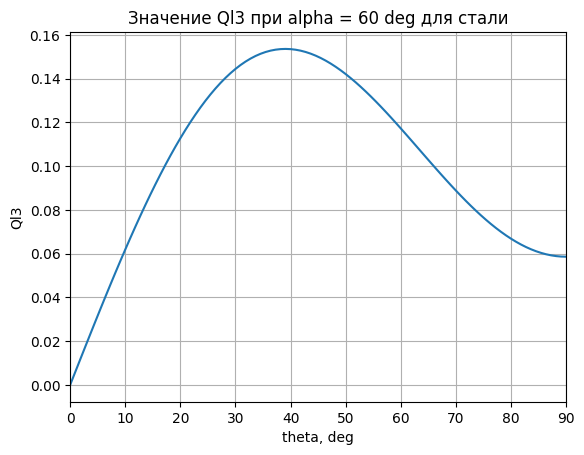

In [234]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  QL3 Determination
# -----------------------------------------------------------------------------------------------------------------------

#plt.subplot(1, 3, 2)
plt.plot(theta, QL3(theta, alpha[2]).imag)
plt.title("Значение Ql3 при alpha = 60 deg для стали")
plt.ylabel("Ql3")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()


C:\Users\User\AppData\Local\Temp\ipykernel_15712\3854857659.py:115: RuntimeWarning: divide by zero encountered in divide
  return (0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2 + 0j) / (Gamma_L_plus(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)) + 0j)
C:\Users\User\AppData\Local\Temp\ipykernel_15712\3854857659.py:115: RuntimeWarning: invalid value encountered in divide
  return (0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2 + 0j) / (Gamma_L_plus(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)) + 0j)


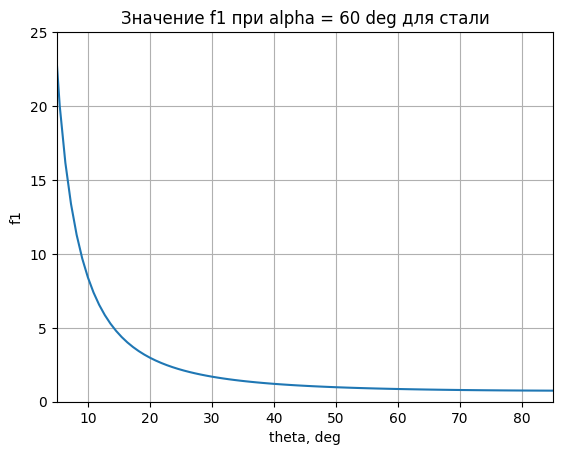

In [238]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  f1 Determination
# -----------------------------------------------------------------------------------------------------------------------


plt.plot(theta[1:], f_1(M_minus_al, KsKl["alum"], KrKl["alum"], theta, alpha[2])[1:].imag)
plt.title("Значение f1 при alpha = 60 deg для стали")
plt.ylabel("f1")
plt.xlabel("theta, deg")
plt.ylim(0, 25)
plt.xlim(5, 85)
plt.grid()


In [239]:
f_1(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2])[1:].imag

C:\Users\User\AppData\Local\Temp\ipykernel_15712\3854857659.py:115: RuntimeWarning: divide by zero encountered in divide
  return (0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2 + 0j) / (Gamma_L_plus(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)) + 0j)
C:\Users\User\AppData\Local\Temp\ipykernel_15712\3854857659.py:115: RuntimeWarning: invalid value encountered in divide
  return (0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2 + 0j) / (Gamma_L_plus(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)) + 0j)


array([212.97821604,  90.97288379,  52.95577827,  35.27025923,
        25.39858657,  19.26505787,  15.17130021,  12.29412931,
        10.19106166,   8.60550284,   7.37972043,   6.41215091,
         5.63487366,   5.00100981,   4.47732583,   4.03971345,
         3.67033059,   3.35573859,   3.08565662,   2.85210962,
         2.64883343,   2.47085192,   2.31417142,   2.17555661,
         2.05236394,   1.94241624,   1.84390738,   1.75532881,
         1.67541263,   1.60308692,   1.53744051,   1.47769484,
         1.42318151,   1.37332404,   1.32762314,   1.28564459,
         1.24700935,   1.21138532,   1.17848056,   1.14803757,
         1.11982851,   1.09365124,   1.06932584,   1.04669179,
         1.02560551,   1.0059382 ,   0.98757413,   0.97040899,
         0.95434864,   0.93930789,   0.92520952,   0.91198339,
         0.89956568,   0.88789823,   0.87692794,   0.86660627,
         0.85688875,   0.84773462,   0.83910644,   0.83096982,
         0.82329309,   0.81604707,   0.80920489,   0.80

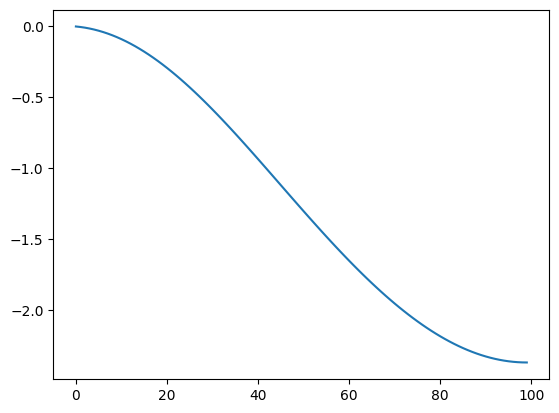

In [155]:
plt.plot((Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2]))).imag)

In [162]:
(0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))

C:\Users\User\AppData\Local\Temp\ipykernel_15712\2376465678.py:1: RuntimeWarning: divide by zero encountered in divide
  (0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))
C:\Users\User\AppData\Local\Temp\ipykernel_15712\2376465678.py:1: RuntimeWarning: invalid value encountered in divide
  (0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))


array([inf         +nanj, -0.+182.15163263j, -0. +78.33033609j,
       -0. +45.82454747j, -0. +30.63672381j, -0. +22.1267079j ,
       -0. +16.82161463j, -0. +13.27054358j, -0. +10.76847373j,
       -0.  +8.93551901j, -0.  +7.55088339j, -0.  +6.47855236j,
       -0.  +5.63077425j, -0.  +4.94875823j, -0.  +4.39185841j,
       -0.  +3.93121502j, -0.  +3.54586225j, -0.  +3.22026287j,
       -0.  +2.94269956j, -0.  +2.70419796j, -0.  +2.49778887j,
       -0.  +2.31799263j, -0.  +2.16045219j, -0.  +2.02166761j,
       -0.  +1.89880118j, -0.  +1.78953241j, -0.  +1.69194883j,
       -0.  +1.60446274j, -0.  +1.52574723j, -0.  +1.45468635j,
       -0.  +1.39033614j, -0.  +1.33189373j, -0.  +1.27867281j,
       -0.  +1.23008384j, -0.  +1.1856182j , -0.  +1.14483514j,
       -0.  +1.10735126j, -0.  +1.07283173j, -0.  +1.04098313j,
       -0.  +1.01154741j, -0.  +0.98429695j, -0.  +0.95903027j,
       -0.  +0.9355686j , -0.  +0.91375281j, -0.  +0.89344088j,
       -0.  +0.87450579j, -0.  +0.856833

In [160]:
Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2]))

array([-0.+0.j        , -0.-0.00360353j, -0.-0.00838698j, -0.-0.01435689j,
       -0.-0.02151721j, -0.-0.02986935j, -0.-0.03941219j, -0.-0.05014217j,
       -0.-0.06205329j, -0.-0.07513723j, -0.-0.08938336j, -0.-0.10477885j,
       -0.-0.12130872j, -0.-0.13895594j, -0.-0.15770147j, -0.-0.17752443j,
       -0.-0.19840209j, -0.-0.22031003j, -0.-0.24322222j, -0.-0.2671111j ,
       -0.-0.29194768j, -0.-0.31770165j, -0.-0.34434149j, -0.-0.37183453j,
       -0.-0.40014707j, -0.-0.42924448j, -0.-0.45909129j, -0.-0.48965127j,
       -0.-0.52088756j, -0.-0.55276271j, -0.-0.5852388j , -0.-0.61827754j,
       -0.-0.65184029j, -0.-0.68588821j, -0.-0.72038229j, -0.-0.75528344j,
       -0.-0.79055256j, -0.-0.8261506j , -0.-0.86203863j, -0.-0.89817788j,
       -0.-0.93452983j, -0.-0.97105623j, -0.-1.00771915j, -0.-1.04448106j,
       -0.-1.08130482j, -0.-1.11815376j, -0.-1.15499169j, -0.-1.19178294j,
       -0.-1.22849239j, -0.-1.26508551j, -0.-1.30152832j, -0.-1.33778749j,
       -0.-1.37383032j, -

C:\Users\User\AppData\Local\Temp\ipykernel_15712\3729260656.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(((0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))).imag)
C:\Users\User\AppData\Local\Temp\ipykernel_15712\3729260656.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(((0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))).imag)


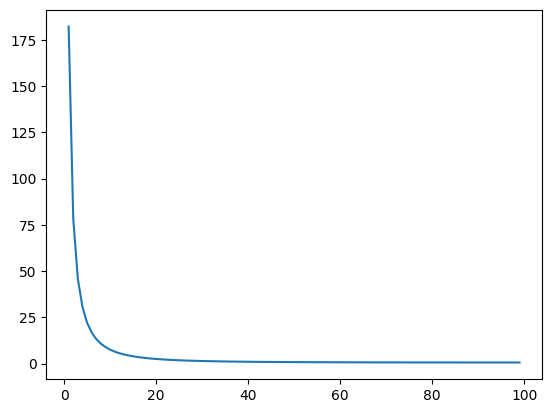

In [164]:
plt.plot(((0.5 * KsKl['steel']**2 - Ksi_new(alpha[2])**2 - cOf(theta, alpha[2])**2 + 0j) / (Gamma_L_plus(theta, alpha[2]) * R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]) * (Ksi_new(alpha[2]) + aOf(alpha[2])))).imag)

In [ ]:
f1_1[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_minus1[i] * gamma_Lplus1[i] * (-zeta1[i] + a_0f))

(0.5 * KsKl**2 - Ksi_new(alpha)**2 - cOf(theta, alpha)**2) / 
(Gamma_L_plus_new(theta, alpha) * R_minus(M_minus, KsKl, KrKl, theta, alpha) * (Ksi_new(alpha) + aOf(alpha)))

In [128]:
Ksi_new(60) + aOf(60)

np.float64(-1.0000000000000002)

In [132]:
0.5 * KsKl['steel']**2 - Ksi_new(60)**2 - cOf(13.080808, 60)**2

np.float64(0.6946172705960137)

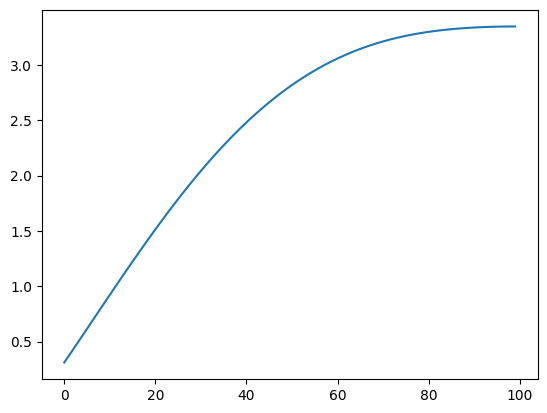

In [134]:
plt.plot(R_minus(M_minus_st, KsKl["steel"], KrKl["steel"], theta, alpha[2]))

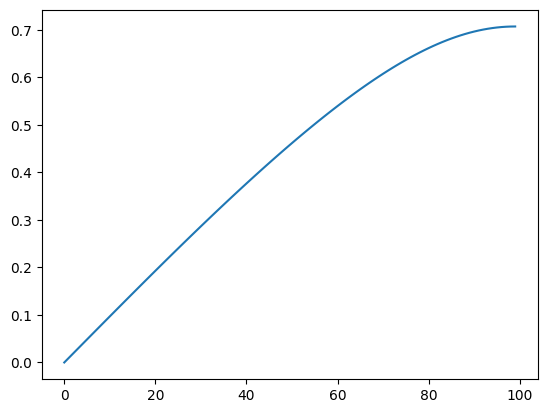

In [135]:
plt.plot(Gamma_L_plus_new(theta, alpha[2]).imag)

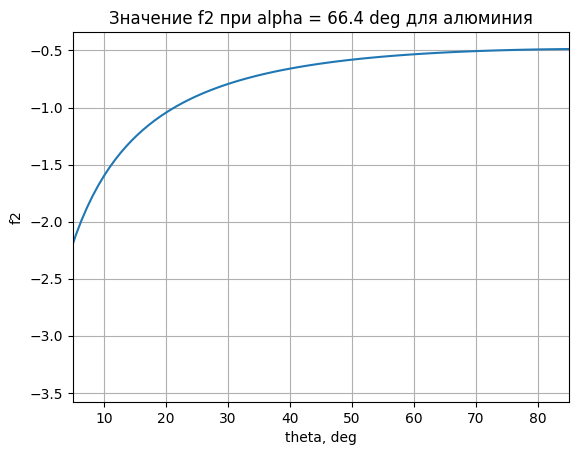

In [251]:
# -----------------------------------------------------------------------------------------------------------------------
#                                                  f2 Determination
# -----------------------------------------------------------------------------------------------------------------------

plt.plot(theta, f_2(M_minus_al, KsKl["alum"], KrKl["alum"], theta, alpha[2]))
plt.title("Значение f2 при alpha = 66.4 deg для алюминия")
plt.ylabel("f2")
plt.xlabel("theta, deg")
plt.xlim(5, 85)
#plt.ylim(-2.75, -0.25)
plt.grid()

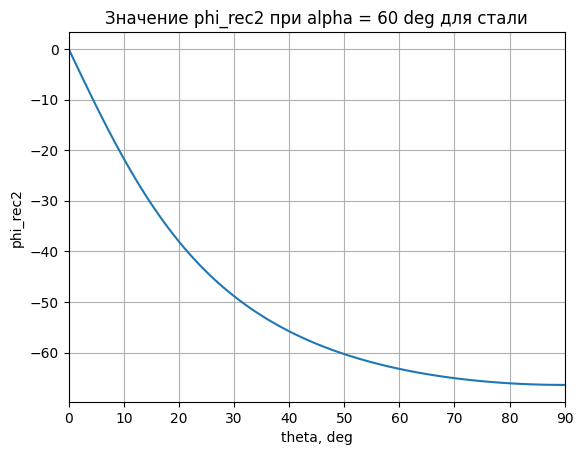

In [245]:
# ----------------------------------------------------------------------------------------------------------------------
#                                                  phi_rec Understanding
# ----------------------------------------------------------------------------------------------------------------------
#plt.subplot(1, 3, 2)
plt.plot(theta, phi_rec2(theta, alpha[2]))
plt.title("Значение phi_rec2 при alpha = 60 deg для стали")
plt.ylabel("phi_rec2")
plt.xlabel("theta, deg")
plt.xlim(0, 90)
plt.grid()

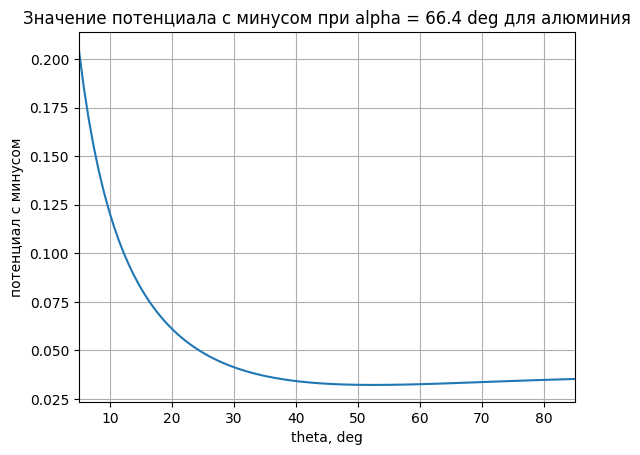

In [292]:
# ----------------------------------------------------------------------------------------------------------------------
#                                                  Potencial_plus Understanding
# ----------------------------------------------------------------------------------------------------------------------
#plt.subplot(1, 3, 2)
x_0 = 15
plt.plot(
    theta,
    modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["alum"], KrKl["alum"], x_0),
)
plt.title("Значение потенциала с минусом при alpha = 66.4 deg для алюминия")
plt.ylabel("потенциал с минусом")
plt.xlabel("theta, deg")
plt.xlim(5, 85)
#plt.ylim(0, 5)
plt.grid()

In [ ]:
## def modFdymenO_plus(M_minus, theta, alpha, KsKl, KrKl, x_0):
    #return 

np.sqrt(p(theta, alpha)/((KsKl**2 - 1)*(KsKl + aOf(alpha)))) * (1/np.sqrt(r(theta, alpha, x_0))) *
(-QL1(theta, alpha, KsKl) * f_1(M_minus, KsKl, KrKl, theta, alpha) + QL3(theta, alpha) * f_2(M_minus, KsKl, KrKl, theta, alpha)) 
* np.sin(phi_rec2(theta, alpha) * np.pi/180)


In [ ]:
( np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau + a_0f)) ) *
(- Q1_L1[i] * f1_1[i] + 1j * Q1_L3[i] * f1_2[i]) 
* (np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i]))) #* np.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))

In [290]:
# zero_db_0 = modFdymenO_plus(
#     M_minus_st, theta[3], alpha[0], KsKl["steel"], KrKl["steel"], x_0
# )
# zero_db_1 = modFdymenO_plus(
#     M_minus_st, theta[3], alpha[2], KsKl["steel"], KrKl["steel"], x_0
# )
# zero_db_2 = modFdymenO_plus(
#     M_minus_st, theta[3], alpha[2], KsKl["steel"], KrKl["steel"], x_0
# )


#Здесь мы находим максимум потенциала, отбрасывая nan-значения и оставляя интервал от 5 до 85 градусов
max_f = np.max(modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["alum"], KrKl["alum"], x_0)[np.where(~np.isnan(modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["alum"], KrKl["alum"], x_0)))])

theta_max = 5 + np.argmax(modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["alum"], KrKl["alum"], x_0)[np.where(~np.isnan(modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["alum"], KrKl["alum"], x_0)))])
print(max_f, '\n' ,theta_max)

(0.205205235626355-0j) 
 5


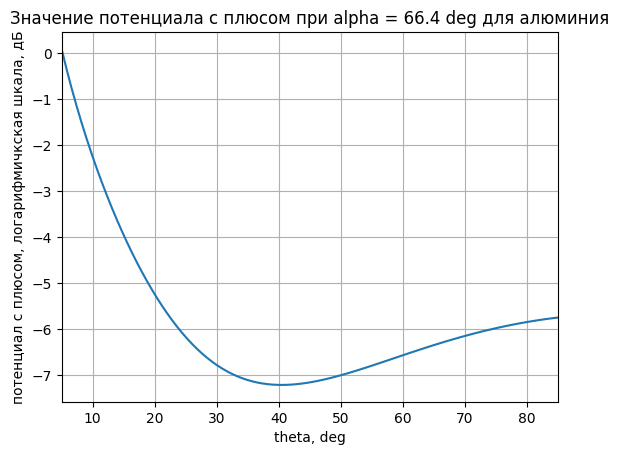

In [305]:
# --------------------------------------------------In Decibel scale-----------------------------------------------------

# print("theta[-1]:")
# print(theta[-1])
# print("zero_db_al:")
# print(zero_db_al)

# zero_db_al = modFdymenO_plus(
#     M_minus_al, theta_max , alpha[2], KsKl["alum"], KrKl["alum"], x_0
# )

zero_db_al = np.max(modFdymenO_plus(
    M_minus_al, theta_max , alpha[2], KsKl["alum"], KrKl["alum"], x_0
)[6:])

plt.plot(
    theta,
    10
    * np.log10(modFdymenO_plus(M_minus_al, theta, alpha[2], KsKl["steel"], KrKl["steel"], x_0) / zero_db_al),
)
plt.title("Значение потенциала с плюсом при alpha = 66.4 deg для алюминия")
plt.ylabel("потенциал с плюсом, логарифмичкская шкала, дБ")
plt.xlabel("theta, deg")
# plt.ylim(-7.5,0)
plt.xlim(5, 85)
plt.grid()

In [285]:
modFdymenO_plus(M_minus_al[5], theta[5], alpha[2], KsKl["steel"], KrKl["steel"], x_0)

np.complex128(0.08562968061152494-0j)

In [286]:
zero_db_al

array([0.20520524-0.j, 0.18634543-0.j, 0.17053411-0.j, 0.15709954-0.j,
       0.14555331-0.j, 0.13553182-0.j, 0.12675885-0.j, 0.1190208 -0.j,
       0.11214994-0.j, 0.1060127 -0.j, 0.10050145-0.j, 0.0955285 -0.j,
       0.09102165-0.j, 0.08692097-0.j, 0.08317631-0.j, 0.07974533-0.j,
       0.07659211-0.j, 0.07368595-0.j, 0.07100043-0.j, 0.06851276-0.j,
       0.06620311-0.j, 0.06405421-0.j, 0.06205089-0.j, 0.06017981-0.j,
       0.05842921-0.j, 0.05678862-0.j, 0.05524877-0.j, 0.05380134-0.j,
       0.05243893-0.j, 0.05115486-0.j, 0.04994314-0.j, 0.04879835-0.j,
       0.0477156 -0.j, 0.04669044-0.j, 0.04571883-0.j, 0.04479711-0.j,
       0.04392191-0.j, 0.04309018-0.j, 0.0422991 -0.j, 0.0415461 -0.j,
       0.04082881-0.j, 0.04014505-0.j, 0.03949283-0.j, 0.03887027-0.j,
       0.03827568-0.j, 0.03770746-0.j, 0.03716414-0.j, 0.03664438-0.j,
       0.03614689-0.j, 0.03567051-0.j, 0.03521414-0.j, 0.03477677-0.j,
       0.03435743-0.j, 0.03395526-0.j, 0.03356942-0.j, 0.03319914-0.j,
      

IndexError: list index out of range

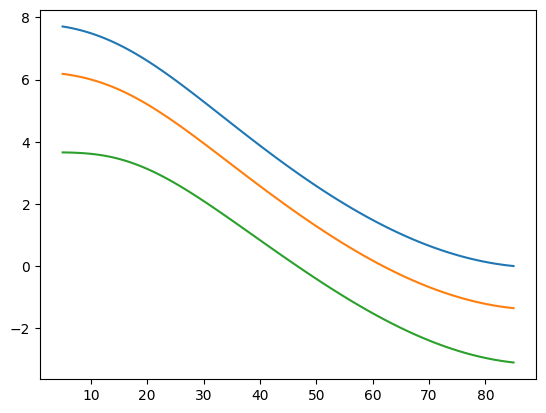

In [295]:
# --------------------------------------------------Graphs at different angles-------------------------------------------
zero_db = modFdymenO_minus(
    M_minus_st, theta[-1], alpha[0], KsKl["steel"], KrKl["steel"], x_0
)

plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[0], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[0]),
)
plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[1], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[1]),
)
plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[2], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[2]),
)
plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[3], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[3]),
)
plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[4], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[4]),
)
plt.plot(
    theta,
    20
    * np.log10(
        zero_db
        / modFdymenO_minus(
            M_minus_st, theta, alpha[5], KsKl["steel"], KrKl["steel"], x_0
        )
    ),
    label=str(alpha[5]),
)

19
19


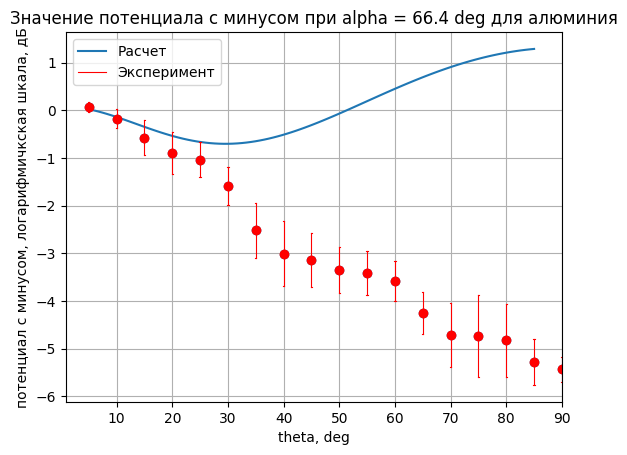

In [315]:
#---------------------------------------Experiment comparison aluminium-------------------------------------------------

x_0 = 15

amp_exp = [35.0, 35.07420363,	34.82368375, 34.42777543, 34.10981822, 33.96666407, 33.41057105, 32.48263609, 31.988797, 31.85101757, 31.64883536, 31.5830519, 31.42129971, 30.74169526, 30.2918789, 30.26325443, 30.17102031, 29.7191309, 29.56317883]

ang_exp = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
CIs = [0.168471297,	0.101836559, 0.195725349, 0.369882563, 0.437561254, 0.371976226, 0.395229008, 0.577867542, 0.679742726, 0.566289132, 0.477751997, 0.460210742, 0.412434641, 0.438626757, 0.667789632, 0.864048922, 0.768846937, 0.480906636, 0.269165204]

# zero_db_al = np.max(modFdymenO_plus(
#     M_minus_al, theta, 66.4, KsKl["alum"], KrKl["alum"], x_0
# ))

zero_db_al = modFdymenO_plus(
    M_minus_al, theta[1] , alpha[2], KsKl["alum"], KrKl["alum"], x_0
)

amp_exp1 = np.array(amp_exp) - 35.0
ang_exp1 = ang_exp[::-1] #Почему????????????????????7
print(len(amp_exp1))
print(len(ang_exp))

# print(20 * np.log10(zero_db_2 / modFdymenO_minus(M_minus_st, theta, 66.4, KsKl['steel'], KrKl['steel'], x_0)))
# print('Minus potenzial numbers')
# print(modFdymenO_minus(M_minus_al, theta, alpha[2], KsKl['alum'], KrKl['alum'], x_0))
# print(zero_db_al)
plt.plot(theta, 10 * np.log10(modFdymenO_plus(M_minus_al, theta, 66.4, KsKl['alum'], KrKl['alum'], x_0) / zero_db_al), label = 'Расчет')
for i in range(len(amp_exp1)):
    whisker_plot(ang_exp[i], amp_exp1[i], CIs[i], color_dot='red', marker_dot= 'o', color_whisker= 'red')

plt.scatter(ang_exp, amp_exp1)
plt.title('Значение потенциала с минусом при alpha = 66.4 deg для алюминия')
plt.ylabel('потенциал с минусом, логарифмичкская шкала, дБ')
plt.xlabel('theta, deg')
plt.xlim(0.9,90)
plt.legend(['Расчет', 'Эксперимент'])
plt.grid()
plt.show()

In [301]:
amp_exp1[1]

np.float64(0.07420362999999952)

In [312]:
zero_db_al = modFdymenO_plus(
    M_minus_al, theta[1] , alpha[2], KsKl["alum"], KrKl["alum"], x_0
)

In [313]:
zero_db_al

array([0.20423074-0.j, 0.1854605 -0.j, 0.16972426-0.j, 0.15635349-0.j,
       0.14486209-0.j, 0.1348882 -0.j, 0.12615689-0.j, 0.11845559-0.j,
       0.11161735-0.j, 0.10550926-0.j, 0.10002418-0.j, 0.09507484-0.j,
       0.0905894 -0.j, 0.0865082 -0.j, 0.08278131-0.j, 0.07936663-0.j,
       0.07622839-0.j, 0.07333602-0.j, 0.07066326-0.j, 0.0681874 -0.j,
       0.06588872-0.j, 0.06375002-0.j, 0.06175622-0.j, 0.05989403-0.j,
       0.05815174-0.j, 0.05651894-0.j, 0.0549864 -0.j, 0.05354585-0.j,
       0.0521899 -0.j, 0.05091194-0.j, 0.04970597-0.j, 0.04856662-0.j,
       0.047489  -0.j, 0.04646871-0.j, 0.04550172-0.j, 0.04458437-0.j,
       0.04371333-0.j, 0.04288555-0.j, 0.04209822-0.j, 0.0413488 -0.j,
       0.04063492-0.j, 0.03995441-0.j, 0.03930528-0.j, 0.03868568-0.j,
       0.03809391-0.j, 0.03752839-0.j, 0.03698766-0.j, 0.03647036-0.j,
       0.03597524-0.j, 0.03550112-0.j, 0.03504692-0.j, 0.03461162-0.j,
       0.03419428-0.j, 0.03379401-0.j, 0.03341   -0.j, 0.03304148-0.j,
      